# P켓몬 데이터 뭉치에서 전설의 P켓몬을 골라낼 수 있을까?

### Chapter 1. P켓몬 데이터셋 하나하나 뜯어보기

### 학습 목표
- 속성, 스탯 등 여러가지 데이터가 있는 P켓몬 데이터셋을 활용해서 `전설의 P켓몬`의 특징을 파악한다.
- 전설의 P켓몬을 분석하기 위해 충분한 EDA를 통해 데이터 전체를 명확히 이해한다.
- 전설의 P켓몬과 일반 P켓몬의 데이터를 직접 비교하며 보다 구체적으로 분석해본다.

---

# Contents
#### 1. 데이터 분석 준비하기
#### 2. EDA #1: 모든 컬럼 뜯어보기
#### 3. EDA #2: Legendary / Ordinary P켓몬 비교하기

---

# 1. 데이터 분석 준비하기

본격적으로 데이터를 분석하기에 앞서, 먼저 앞으로의 데이터 분석에 필요한 module을 import 해 봅니다.    
지금까지 배웠던 numpy, pandas, matplotlib과 함께 또다른 시각화 툴인 seaborn 까지 사용해 보겠습니다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

그 다음, 가장 중요한 데이터셋을 가져와 봅니다. 데이터셋은 아래 출처에서 다운로드 할 수 있습니다.    
데이터를 저장한 후 `pokemon.csv` 이름으로 저장해서 이 노트북과 같은 폴더 내에 위치시켜줍니다.
- 데이터 출처: Kaggle [https://www.kaggle.com/abcsds/pokemon]  

pandas를 활용해 데이터를 가져와보도록 하겠습니다.

In [2]:
pkemon = pd.read_csv("pkemon.csv")
print(pkemon.shape)
pkemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


전체 데이터는 **800개**로 800마리의 P켓몬 데이터가 있고, 각 P켓몬의 특징 데이터는 **13개**씩으로 구성되어있음을 확인할 수 있습니다.

이 중 저희가 타겟으로 두고 확인할 데이터는 `Legendary`(전설의 P켓몬인지 아닌지의 여부)이므로,  
`Legendary == True` 값을 가지는 레전드 P켓몬 데이터셋은 `legendary` 변수에,   
`Legendary == False` 값을 가지는 일반 P켓몬 데이터셋은 `ordinary` 변수에 저장해두겠습니다.

In [3]:
legendary = pkemon[pkemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [4]:
ordinary = pkemon[pkemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


800개 중 65개의 데이터만 전설의 P켓몬이군요! 

In [5]:
65 / 800

0.08125

약 8.13% 정도 됩니다.

---

# 2. EDA #1: 모든 컬럼 뜯어보기

그럼 이제 본격적으로 각 컬럼에 대해 뜯어보겠습니다.    
데이터가 800개이고, 컬럼이 13개로 큰 데이터셋이 아니므로, 최대한 모든 데이터들을 하나하나 이해해볼 수 있을 것 같습니다.

In [6]:
# pkemon 데이터셋 컬럼 종류
print(len(pkemon.columns))
pkemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### 각 컬럼에 대한 설명
각 컬럼이 나타내는 바는 다음 설명과 같습니다.
- **#** : P켓몬 Id number. 같은 P켓몬이지만 성별이 다른 경우 등은 같은 #값을 가진다. `int`


- **Name** : P켓몬 이름. P켓몬 각각의 이름으로, 이름 데이터는 800개의 P켓몬이 모두 다르다. (unique) `str`


- **Type 1** : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. `str`


- **Type 2** : 두 번째 속성. 속성을 하나만 가지는 P켓몬의 경우 Type 2는 NaN값을 가진다. `str`


- **Total** : 전체 6가지 스탯의 총합. `int`


- **HP** : P켓몬의 체력. `int`


- **Attack** : 물리공격력. (scratch, punch 등) `int`


- **Defense** : 물리공격에 대한 방어력. `int`


- **Sp. Atk** : 특수공격력. (fire blast, bubble beam 등) `int`


- **Sp. Def** : 특수공격에 대한 방어력. `int`


- **Speed** : P켓몬 매치에 대해 어떤 P켓몬이 먼저 공격할지를 결정. (더 높은 P켓몬이 먼저 공격한다) `int`


- **Generation** : P켓몬의 세대. 현재 데이터에는 6세대까지 있다. `int`


- **Legendary** : 전설의 P켓몬 여부. **!! Target feature !!** `bool`



## (1) `#` : id number

In [7]:
# 총 몇 종류의 #값이 있는지 확인
len(set(pkemon["#"]))

721

전체 데이터는 총 800개인데 `#`컬럼은 그보다 작은 **721개**의 데이터를 가집니다.     
이 말은 즉, `#` 컬럼의 값은 unique하지 않으며(index로 쓸 수 없으며), 같은 번호를 가지는 컬럼들이 있음을 알 수 있습니다.

In [8]:
# 같은 "#"값을 가지는 P켓몬 example
pkemon[pkemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


예를 들어 #6의 P켓몬은 `Charizard`, `CharizardMega Charizard X`, `CharizardMega Charizard Y` 세 개로 나뉩니다.   
기본 P켓몬인 `Charizard`로부터 시작해서 진화한 `Mega Charizard`가 있고, `X`, `Y`는 성별을 나타내는 것으로 보입니다.

## (2) `Name` : 이름

In [9]:
# 총 몇 개의 이름이 있는지 확인
len(set(pkemon["Name"]))

800

이름은 데이터셋 전체 값과 같이 800개로, unique함을 알 수 있습니다.

---

## (3) `Type 1` & `Type 2` : P켓몬의 속성

무작위로 두 마리의 P켓몬을 한 번 살펴보겠습니다.

In [10]:
pkemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


P켓몬이 가지는 속성은 **기본적으로 하나, 또는 최대 두 개까지** 가질 수 있는 것 같군요.    
특히, 데이터 셋에는 하나만을 가지는 P켓몬은 `Type 1`에만 속성이 표시되고 `Type 2`에는 NaN값이 들어가 있습니다. 

그렇다면, 속성의 종류는 총 몇 가지인지 알아봅시다.

In [11]:
len(list(set(pkemon["Type 1"]))), len(list(set(pkemon["Type 2"])))

(18, 19)

`Type 1`에는 총 18가지, `Type 2`에는 총 19가지의 속성이 들어가 있는데, 여기서 `Type 2`가 한 가지 더 많은 것은

In [12]:
set(pkemon["Type 2"]) - set(pkemon["Type 1"])

{nan}

`Nan`값임을 알 수 있고, 따라서 그 외의 나머지 18가지 속성은 같은 종류로 데이터가 들어가 있음을 알 수 있습니다.

In [13]:
# 모든 타입을 types 변수에 저장
types = list(set(pkemon["Type 1"]))
print(len(types))
print(types)

18
['Bug', 'Fairy', 'Ice', 'Fire', 'Fighting', 'Water', 'Steel', 'Normal', 'Ghost', 'Electric', 'Dark', 'Poison', 'Dragon', 'Flying', 'Psychic', 'Grass', 'Rock', 'Ground']


그렇다면 Type를 하나만 가지고 있는 P켓몬은 몇 마리일까요?

In [14]:
# Type 2가 NaN값인 데이터의 개수
len(pkemon[pkemon["Type 2"].isna()])

386

총 386개의 P켓몬은 속성을 하나만 가지고, 나머지는 두 개의 속성을 가지는군요!

#### `Type 1` 데이터 분포 plot
Legendary를 기준으로 Type 1에는 P켓몬이 어떻게 분포되어있는지 확인해봅니다.

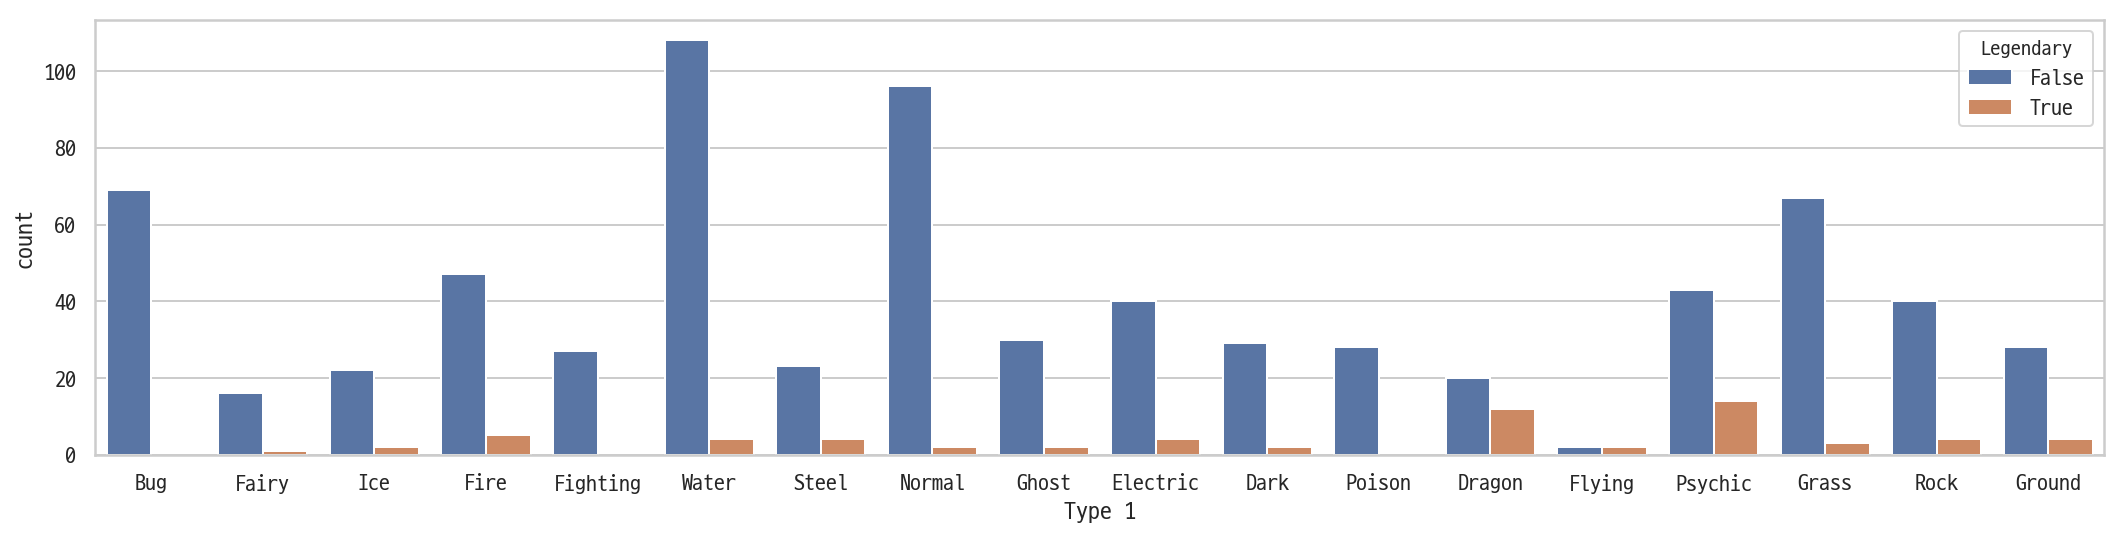

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)

sns.countplot(data=pkemon, x="Type 1", hue="Legendary", order=types)
plt.show()

그렇다면, 피벗테이블로 각 속성에 Legendary P켓몬들이 몇 퍼센트씩 있는지 확인해봅시다.

In [16]:
pd.pivot_table(pkemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False).T

Type 1,Flying,Dragon,Psychic,Steel,Ground,Fire,Electric,Rock,Ice,Dark,Ghost,Fairy,Grass,Water,Normal,Poison,Fighting,Bug
Legendary,0.5,0.375,0.245614,0.148148,0.125,0.096154,0.090909,0.090909,0.083333,0.064516,0.0625,0.058824,0.042857,0.035714,0.020408,0.0,0.0,0.0


Legendary 비율이 가장 높은 속성은 **Flying**으로, 50퍼센트의 비율을 갖습니다.    
전설의 P켓몬들은 많이 날라다님을 알 수 있군요!!

#### `Type 2` 데이터 분포 plot
Type 2는 어떨까요?

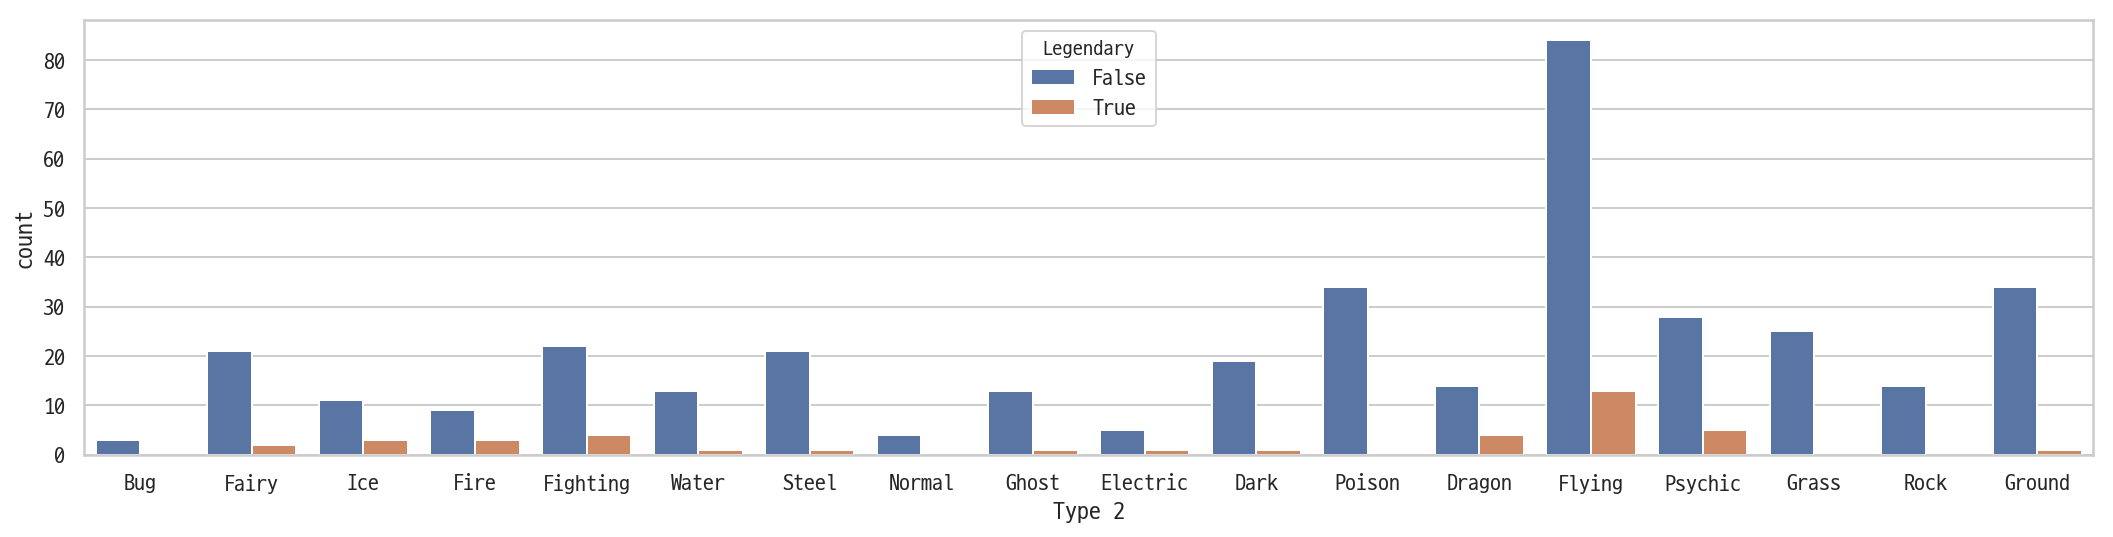

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)

sns.countplot(data=pkemon, x="Type 2", hue="Legendary", order=types)
plt.show()

In [18]:
pd.pivot_table(pkemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False).T

Type 2,Fire,Dragon,Ice,Electric,Fighting,Psychic,Flying,Fairy,Water,Ghost,Dark,Steel,Ground,Rock,Bug,Poison,Normal,Grass
Legendary,0.25,0.222222,0.214286,0.166667,0.153846,0.151515,0.134021,0.086957,0.071429,0.071429,0.05,0.045455,0.028571,0.0,0.0,0.0,0.0,0.0


Type 1때보다 숫자는 낮아졌으나, 역시 **Flying**속성 P켓몬의 Legendary 비율이 25%로 가장 높습니다.

## (4) `Total` : 모든 스탯의 총합

데이터셋에서 P켓몬은 총 6가지의 스탯값을 가집니다. Total 컬럼은 이 6가지 속성값의 총 합입니다.

In [19]:
# 모든 스탯을 stats 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

실제로 총합이 맞는지 확인해볼까요?

In [20]:
# 확인
print("#1 pokemon - {}".format(pkemon[pkemon["#"] == 1]["Name"].values), \
      "\ntotal: ", int(pkemon[pkemon["#"] == 1]["Total"]), "\tstats: ", list(pkemon[pkemon["#"] == 1][stats].values[0]), \
      "\nsum_stats: ", sum(list(pkemon[pkemon["#"] == 1][stats].values[0])), \
      "\n\n(total == sum_stats): ", int(pkemon[pkemon["#"] == 1]["Total"]) == sum(list(pkemon[pkemon["#"] == 1][stats].values[0])))
pkemon[pkemon["#"] == 1]

#1 pokemon - ['Bulbasaur'] 
total:  318 	stats:  [45, 49, 49, 65, 65, 45] 
sum_stats:  318 

(total == sum_stats):  True


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


위와 같이 Total값은 6개의 스탯을 모두 더한 값이 맞음을 확인했습니다.  

#### `Total`값에 따른 분포 plot
그렇다면 Total값과 legendary는 어떤 관계가 있을지 확인해봅시다.

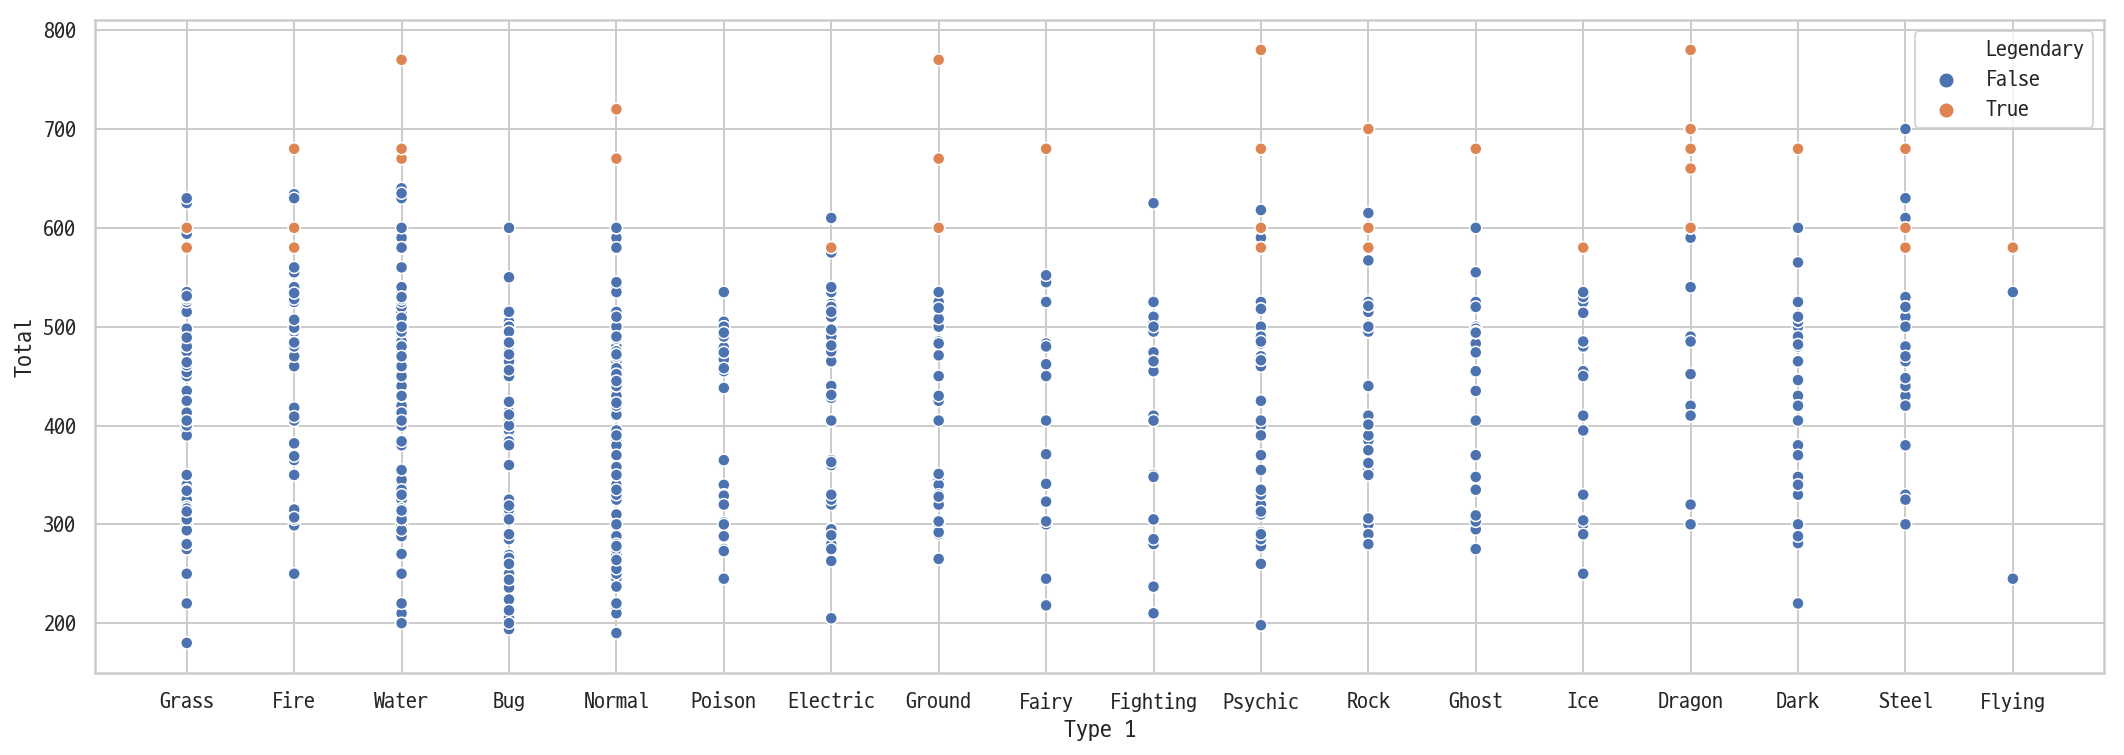

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

sns.scatterplot(data=pkemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

Type 1별로 Total 값을 확인했을 때, **Legendary P켓몬은 주로 Total stat 값이 높다는 것**이 확인됩니다.     
전설의 P켓몬은 왕 쎄군요..!

## (5) Stats: `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`

그렇다면 각각의 stat에 대해서는 어떻게 분포되어 있을까요?    
subplot으로 여러 그래프를 한 번에 확인해봅시다.

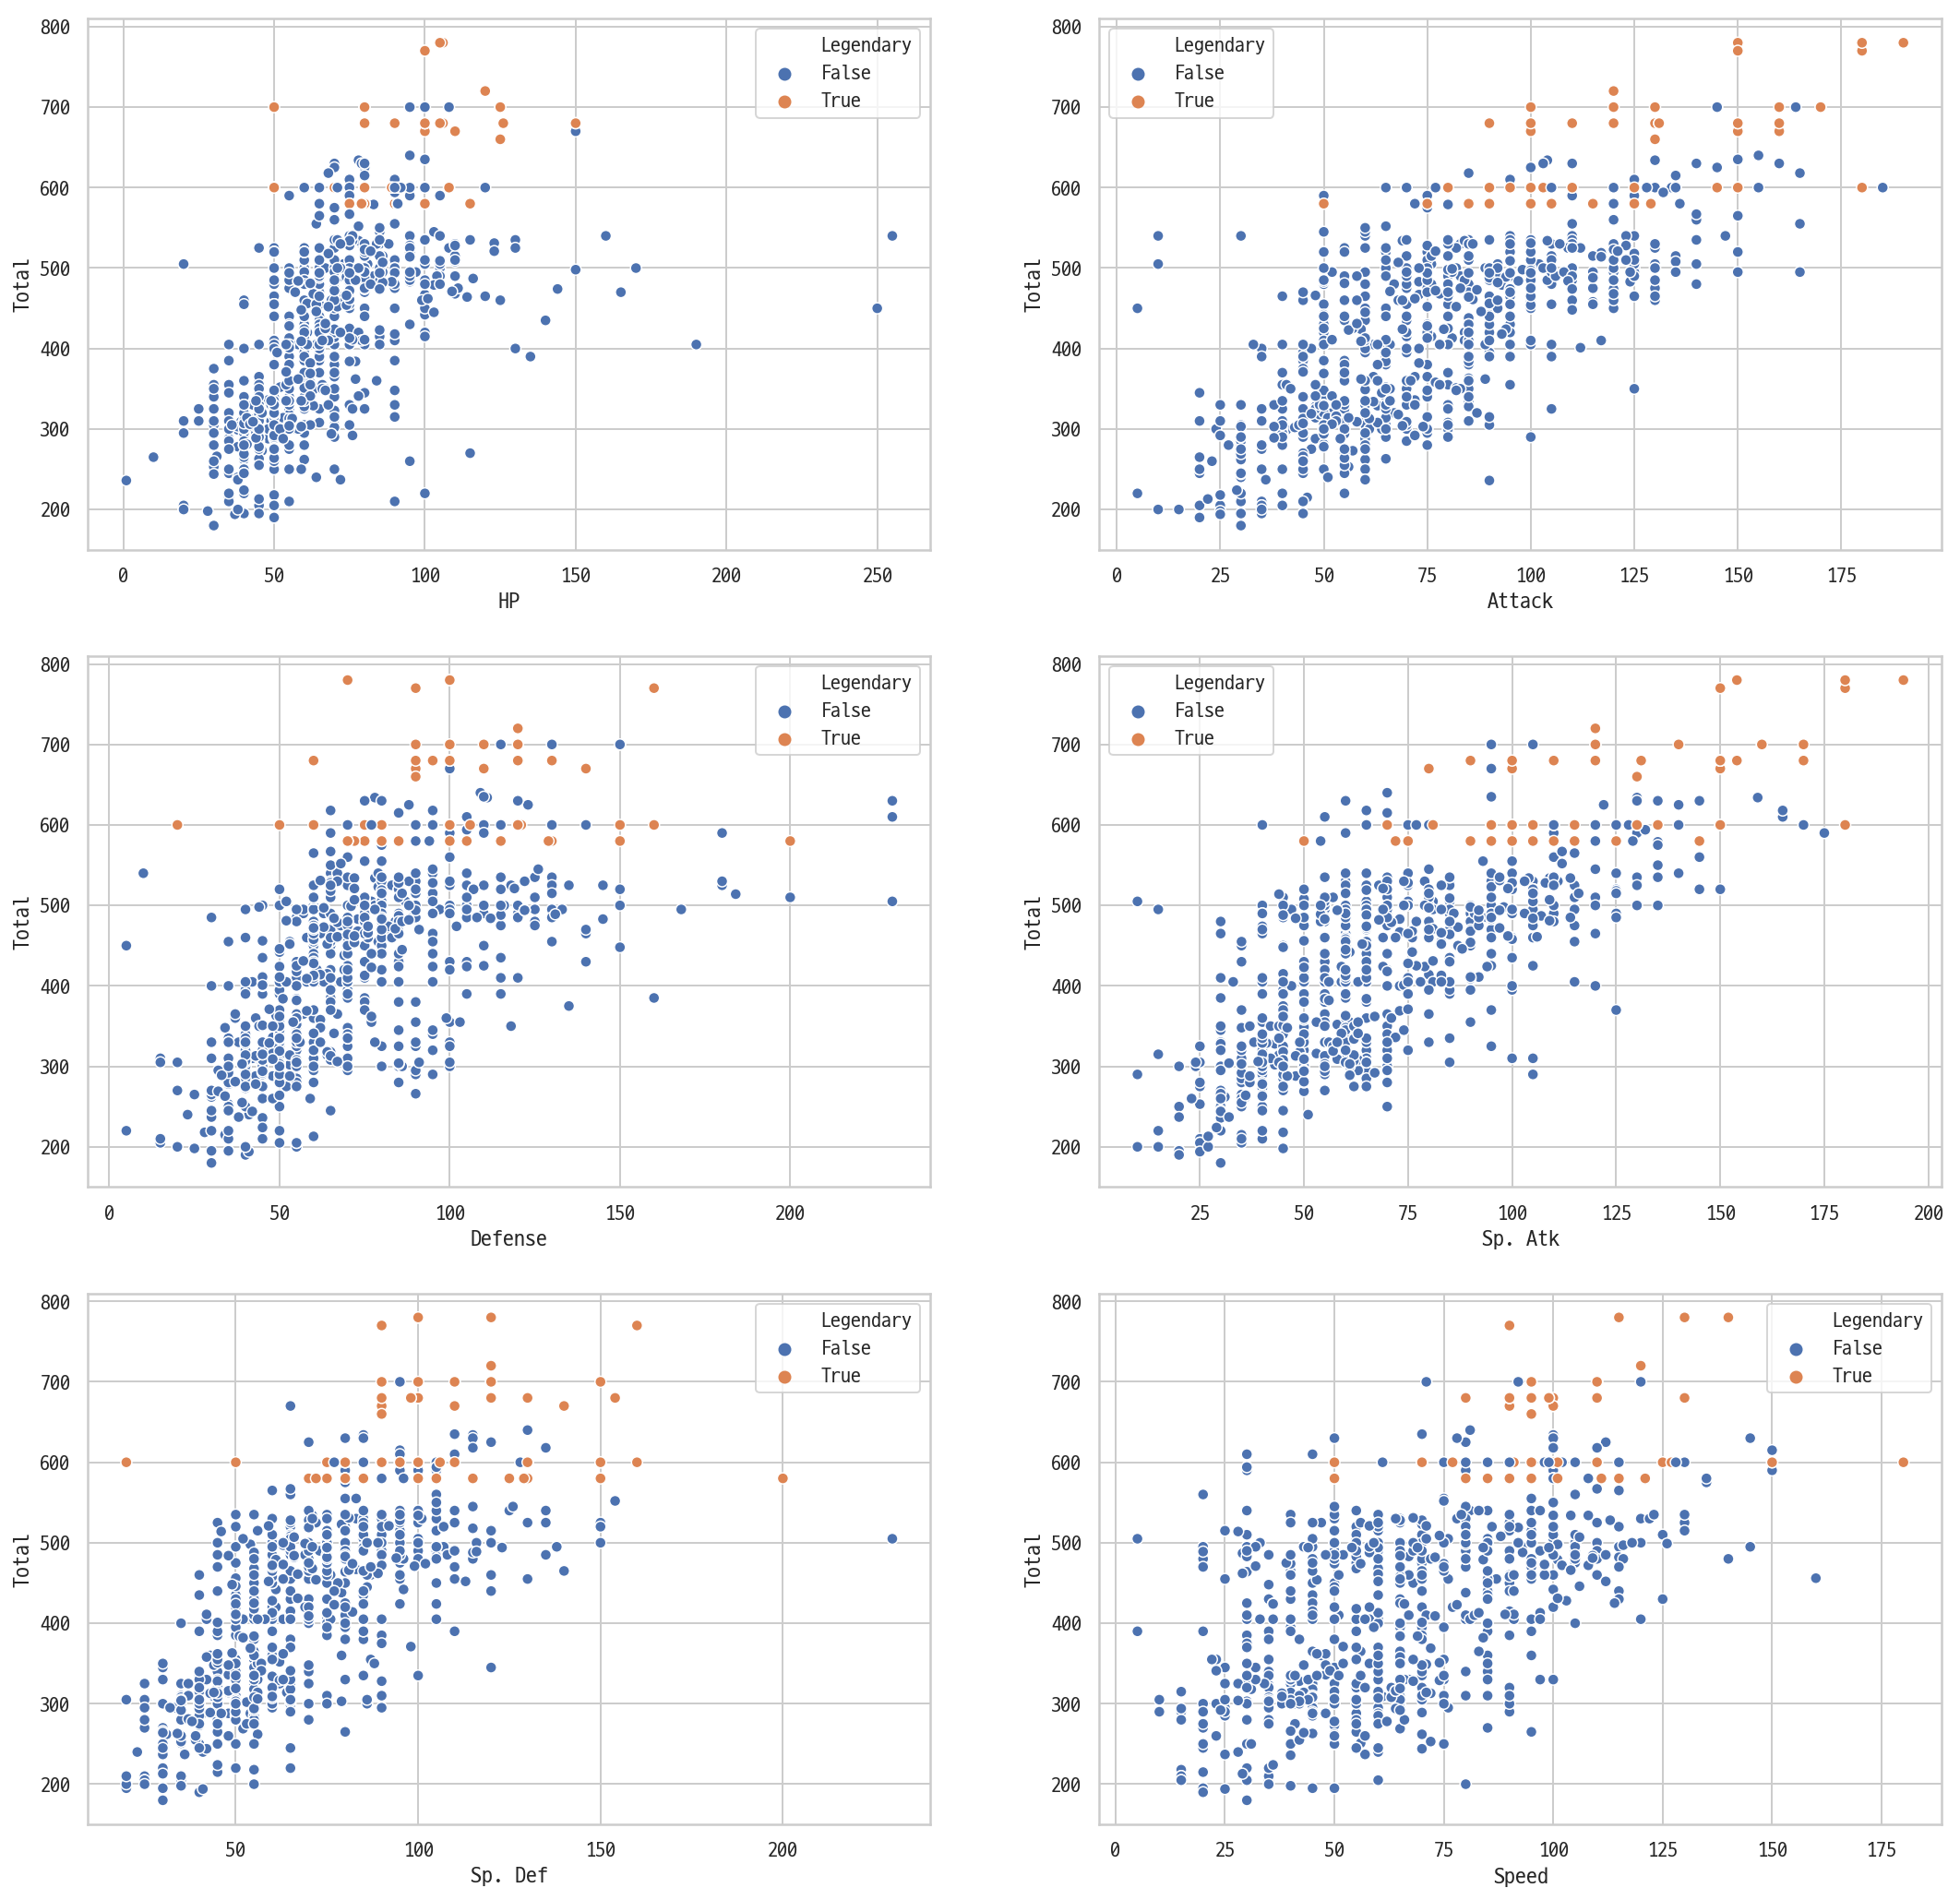

In [22]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 18)

sns.scatterplot(data=pkemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pkemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pkemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pkemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pkemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pkemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

#### 각 스탯에 대한 분석
각각의 스탯에 대한 분석을 해봅시다.

- **`HP`, `Defense`, `Sp. Def`**
    - 전설의 P켓몬은 주로 높은 스탯들을 갖지만, 이 세 가지에서는 일반 P켓몬이 전설의 P켓몬보다 특히 높은 몇몇 P켓몬이 있었다.   
    그러나 그 P켓몬들도 Total값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 P켓몬들로 보인다.   
    (ex. 방어형, 공격형 등)
    
    
- **`Attack`, `Sp. Atk`, `Speed`**
    - 이 세 가지 스탯은 Total과 거의 비례하는 양상을 띈다. 주로 전설의 P켓몬이 가장 높은 값들 또한 가진다.

## (6) `Generation` : P켓몬의 세대

Generation은 각 P켓몬의 "세대"로, 현재 데이터셋에는 1~6세대의 P켓몬이 존재합니다.    
각 세대에 대한 P켓몬의 수를 확인해 봅시다.

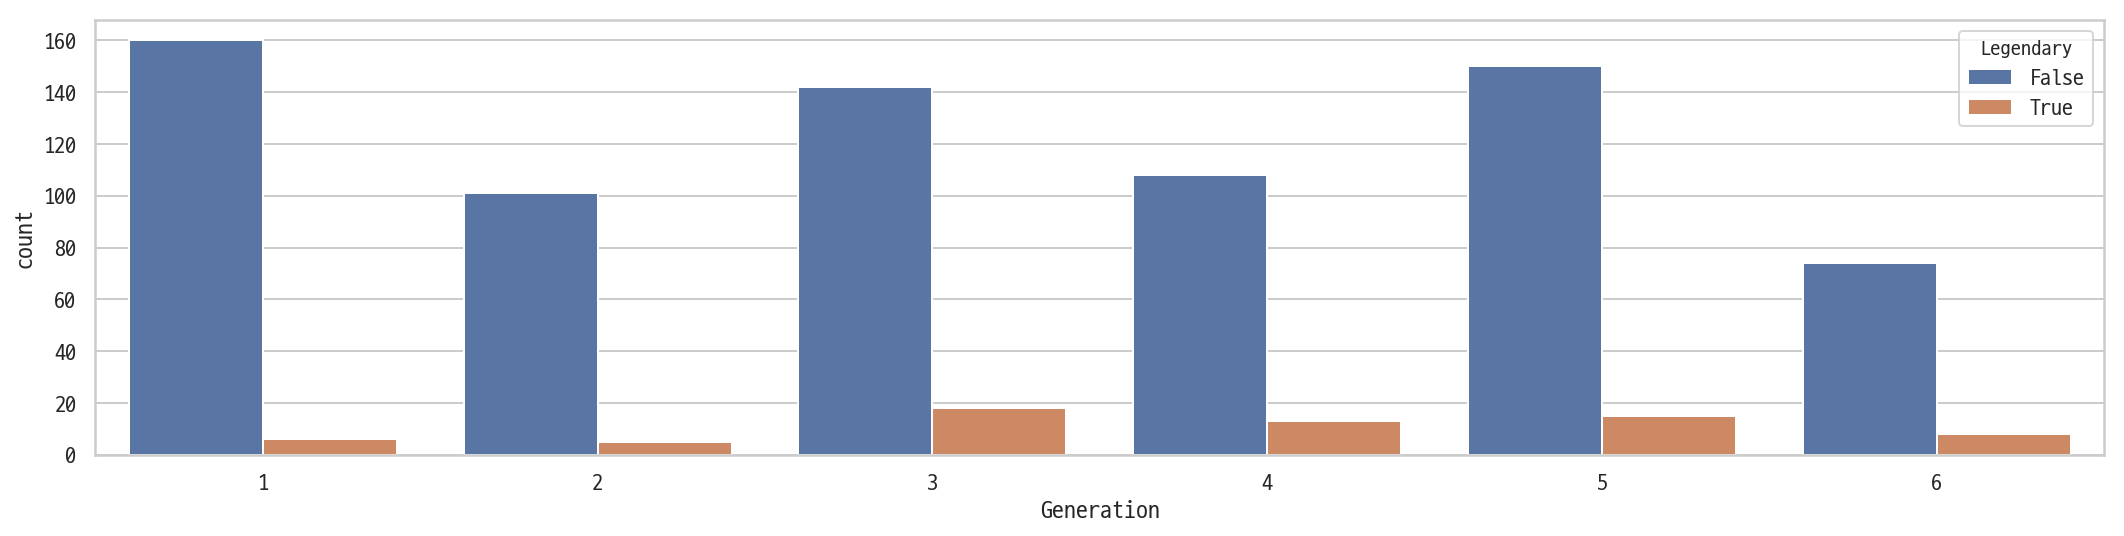

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)

sns.countplot(data=pkemon, x="Generation", hue="Legendary")
plt.show()

In [24]:
# 표로 개수 확인
pkemon.groupby("Generation").size().reset_index(name="counts").T

,0,1,2,3,4,5
Generation,1,2,3,4,5,6
counts,166,106,160,121,165,82


1세대부터 6세대까지, 6세대를 제외하고는 비교적 고르게 분포해 있는 것 같아 보입니다.   
다른 말로 하면, 세대에 따른 Legendary P켓몬의 분포가 특별한 경향을 보이는 것 같지는 않다는 말과 같죠.

---

# 3. EDA #2: Legendary / Ordinary P켓몬 비교하기

지금까지 모든 컬럼에 대해 확인하였으니, 이제 특별히 Legendary P켓몬 또는 Ordinary P켓몬들을 분리해서 개별로 분석해보겠습니다.   
전설의 P켓몬 또는 일반 P켓몬 각각이 가지는 특징들을 세분화해서 확인해볼 필요가 있는거죠!

## (1) 전설의 P켓몬의 `Total` 값

먼저 전설의 P켓몬들의 속성 Total값을 확인해봅시다.

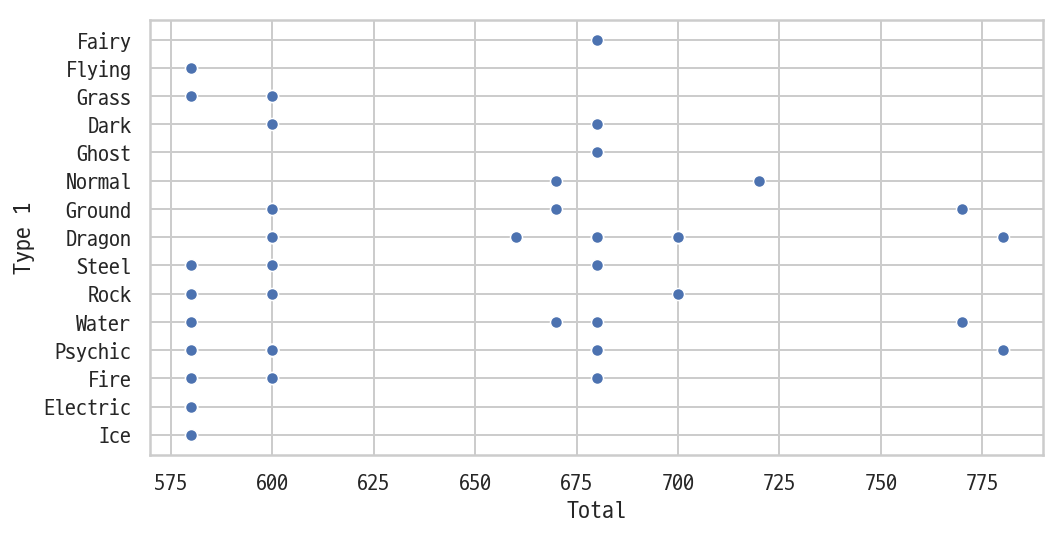

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

앗, 여기서 한 가지 특징이 보이는 것 같습니다.


: 바로, **전설의 P켓몬들의 Total값들이 600 등과 같은 특정 점에 몰려있다**는 것이죠! 무언가 이상하지 않나요?    



실제로 전설의 P켓몬이 가지는 Total값들의 집합을 확인해봅시다.

In [26]:
print(sorted(list(set(legendary["Total"]))), ": ", len(set(legendary["Total"])))

[580, 600, 660, 670, 680, 700, 720, 770, 780] :  9


실제로 단 9가지 값밖에 존재하지 않는군요! 그래프로도 확인해 봅시다.

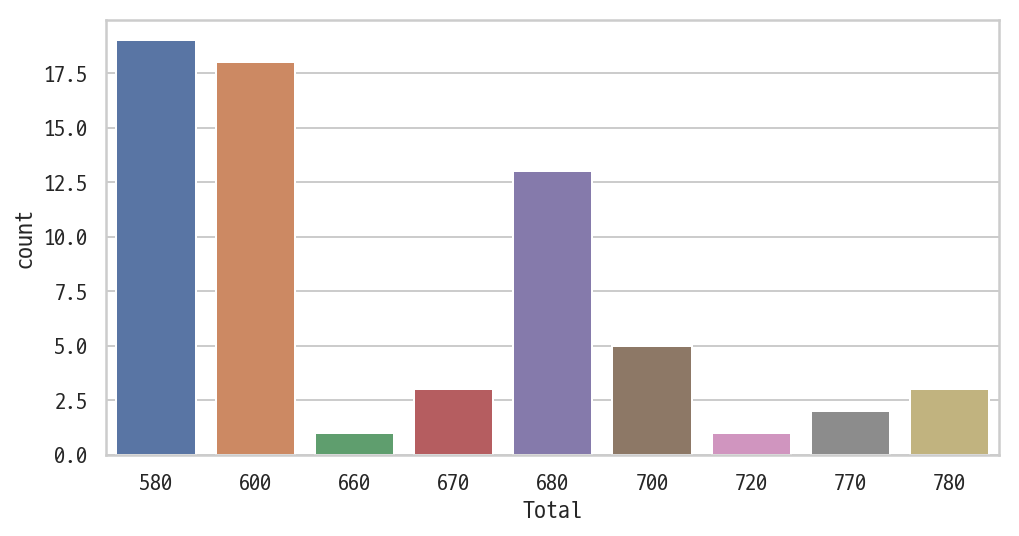

In [27]:
# 전설의 P켓몬이 가지는 Total값에 대한 P켓몬 수 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

흠, 총 65마리의 전설의 P켓모닝 9개의 Total값만 가진다는 것은,

In [28]:
round(65 / 9, 2)

7.22

**약 7.22마리끼리는 같은 Total 스탯값을 가진다**는 의미와 같습니다. 이는 언뜻 봐도 꽤.. 높은 값인 것 같은 느낌을 주네요.

그렇다면 ordinary P켓몬은 어떨까요? 같은 방법으로 다시 확인해봅시다.

In [29]:
print(sorted(list(set(ordinary["Total"]))), ": ", len(set(ordinary["Total"])))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700] :  195


일반 P켓몬은 총 195가지의 Total 속성값을 가지고, 전체 일반 P켓몬은 (800 - 65), 즉 735마리이므로,

In [30]:
round(735 / 195, 2)

3.77

**약 3.77마리만 같은 Total 스탯값을 가지는군요.**   

　    

  
이로써 다음 두 가지를 알 수 있습니다.

- Total값의 다양성은 일반 P켓몬이 전설의 P켓몬보다 두 배 가까이 가진다, 즉 전설의 P켓몬의 Total값은 다양하지 않다.   
    : **total 속성값이 전설의 P켓몬의 값들의 집합에 포함되는지의 여부**는 전설의 P켓몬임을 결정하는 데에 영향을 미친다.



- 또한, **전설의 P켓몬의 Total값 중에는 일반P켓몬이 가지지 못하는 Total값이 존재**한다. ex) 680, 720, 770, 780  
    : Total값은 전설의 P켓몬인지 아닌지의 여부를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있다.  
　

     
즉, **Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것**이라는 결론을 내릴 수 있습니다.

## (2) 전설의 P켓몬의 `Name`, 이름

데이터를 보고 있으면 한 가지 더 특이한 점이 있습니다. 바로 **이름!**  
전설의 P켓몬들의 이름을 보면, **특정 단어가 들어가있는 이름**, 또는 **긴 이름**을 가진 경우가 많음을 확인할 수 있습니다.

### 특정 단어가 들어가있는 이름

In [31]:
# 바로 확인해보자

# 이름이 비슷한 전설의 P켓몬들의 모임 names
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)

먼저, 전설의 P켓몬 중에는 이름이 한 이름에서 파생되어 만들어진 이름들이 있죠. 

In [32]:
# 이름이 세트로 지어져있는 P켓몬들의 모임 set_names
sn1, sn2 = names[:13], names[23:]
set_names = pd.concat([sn1, sn2]).reset_index(drop=True)
set_names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


어떤가요? 이들은 모두 세트로 이름이 지어져 있습니다.    
- **"MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem"** 등의 이름에서부터 그 앞에 성이 붙여진다.   

또는, 이름에 forme가 들어가는 여러가지 전설의 P켓몬이 있는 경우도 존재합니다.

In [33]:
# 전설의 P켓몬 가족 forme
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


이렇게 이름에 forme가 들어가면 이는 전설의 P켓몬일 확률이 아주 높겠군요!

### 긴 이름

위와 비슷한 이유로, 전설의 P켓몬은 이름의 길이도 주로 긴 경우가 많습니다.    
데이터셋에 이름 길이 컬럼을 생성해서 비교해보도록 합니다.

In [34]:
# legendary에 이름 길이 컬럼 생성
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [35]:
# ordinary에 이름 길이 컬럼 생성
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


그렇다면 이 `name_count` 컬럼은 어떤 특징을 갖게 될까요? 그래프로 확인해봅니다.

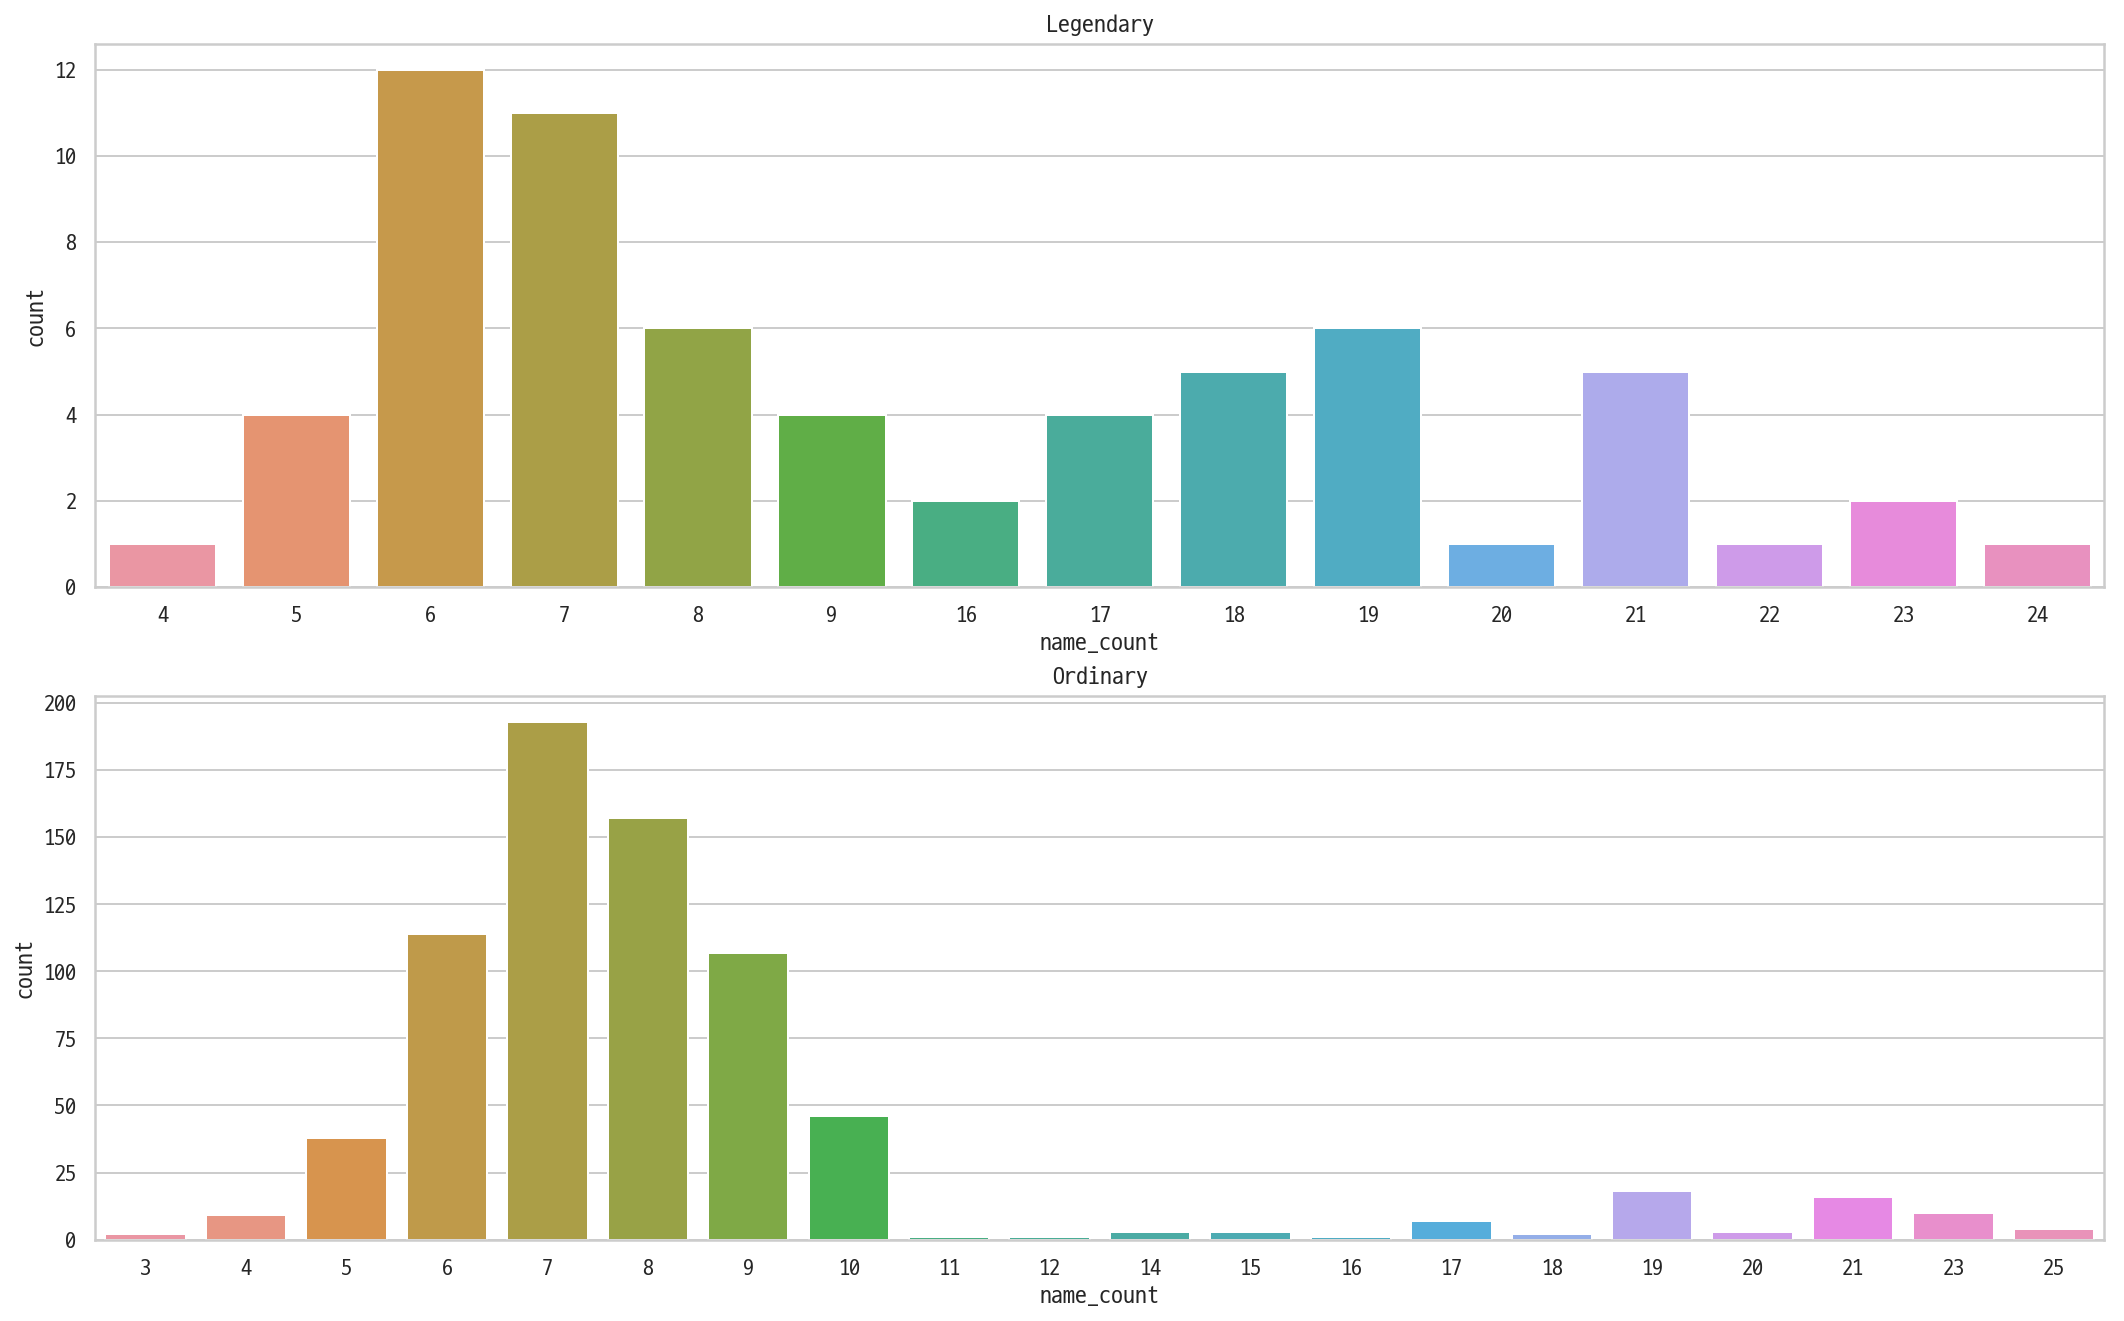

In [36]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 11)

sns.countplot(data=legendary, x="name_count", ax=ax1).set_title("Legendary")
sns.countplot(data=ordinary, x="name_count", ax=ax2).set_title("Ordinary")
plt.show()

위에서 볼 수 있듯이,    
**전설의 P켓몬은 16 이상의 긴 이름을 가진 P켓몬이 많은** 반면, **일반 P켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮습니다.**

In [37]:
# 전설의 P켓몬의 이름이 10 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [38]:
# 일반 P켓몬의 이름이 10 이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


**전설의 P켓몬의 이름이 10 이상일 확률은 41%**를 넘는 반면, **일반 P켓몬의 이름이 10 이상일 확률은 약 16%**밖에 안됨을 확인할 수 있습니다!      
이는 아주 큰 차이이므로 legendary인지 아닌지를 구분하는데에 큰 의미를 가집니다.

- 위의 두 가지, 이름에 대한 분석은 중요한 시사점을 가집니다.   

    : **만약 "Latios"가 전설의 P켓몬이라면, "%%% Latios" 또한 전설의 P켓몬이다!   
    : 적어도 전설의 P켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!  
    : 전설의 P켓몬은 긴 이름을 가졌을 확률이 높다!**